## Visualize sample data

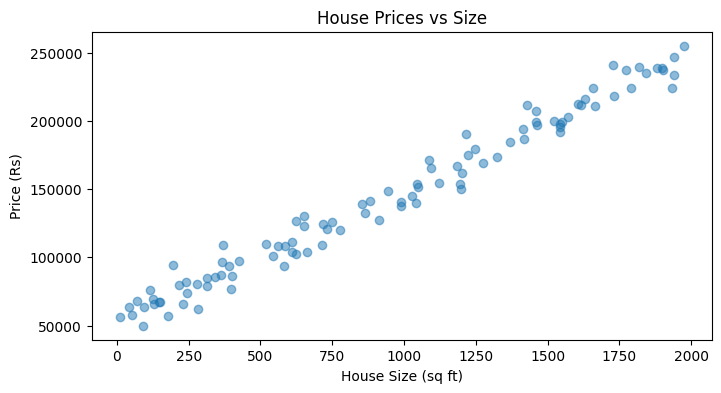

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)  # for reproducibility
house_sizes = 2000 * np.random.rand(100, 1)  # Random sizes between 0 and 2000 sq ft

#  y         =  w  *     x       +   b    +       random noise
house_prices = 100 * house_sizes + 50000  + 10000 * np.random.randn(100, 1)  # Prices with some noise


# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(house_sizes, house_prices, alpha=0.5)
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price (Rs)")
plt.title("House Prices vs Size")

# Save the plot as an image
plt.savefig('house_prices_vs_size.png')

# Display the plot
plt.show()

## Normal Equation

In [13]:
import numpy as np

# Assuming we have our house_sizes and house_prices from earlier

# Add x0 = 1 to each instance for the bias term
X_b = np.c_[np.ones((100, 1)), house_sizes]

# Calculate theta using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(house_prices)

print("Theta calculated using Normal Equation:", theta_best)

Theta calculated using Normal Equation: [[52150.96157547]
 [   97.70113386]]


## Creating and Fitting the Model

In [16]:
from sklearn.linear_model import LinearRegression

# Create the model
lin_reg = LinearRegression()

# Fit the model to our data
lin_reg.fit(house_sizes, house_prices)

# Print the model parameters
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

Intercept: [52150.96157547]
Coefficient: [[97.70113386]]


## Making Predictions

In [17]:
# Generate points for prediction
X_new = np.array([[1000], [2000]])

# Make predictions
y_predict = lin_reg.predict(X_new)

print("Predicted prices for 1000 and 2000 sq ft houses:", y_predict)

Predicted prices for 1000 and 2000 sq ft houses: [[149852.09543985]
 [247553.22930424]]


## Visualizing the Results

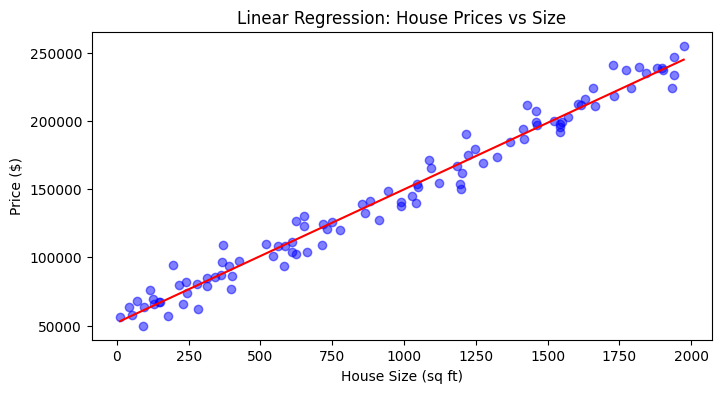

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get the min and max of house sizes
x_min, x_max = house_sizes.min(), house_sizes.max()

# Create a range of house sizes for the line
X_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)

# Predict prices for this range
Y_line = lin_reg.predict(X_line)

plt.figure(figsize=(8, 4))
plt.scatter(house_sizes, house_prices, color='blue', alpha=0.5, label='Data points')
plt.plot(X_line, Y_line, color='red', label='Regression Line')
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("Linear Regression: House Prices vs Size")
# plt.legend()

# Save the plot as an image
plt.savefig('linear_regression.png')

# Display the plot
plt.show()

## Evaluating the model

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on our original data
y_pred = lin_reg.predict(house_sizes)

# Calculate MSE and R-squared
mse = mean_squared_error(house_prices, y_pred)
r2 = r2_score(house_prices, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  80658456.39670533
R-squared score:  0.9764567983510799
